In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Importing the dataframe
df = pd.read_csv('C:/Users/jwhoj/Desktop/Capstone_1/KC_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
df = df.drop(['date'],axis=1)

In [5]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Linear Regression

In [6]:
# Create the linear regressor: reg 
reg = LinearRegression()

In [7]:
# Train/test split 
from sklearn.model_selection import train_test_split  

In [8]:
labels = df['price']
train1 = df.drop(['id', 'price'],axis=1)

In [9]:
# Create training and test sets, train data 70% and 30% test data, randomize splitting by using random state 
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.30,random_state =2)

In [10]:
# Fit the regressor to the training data 
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# Check score of data/how well it performed/predicted 
reg.score(x_test,y_test)

0.7069504260660439

Linear regression returns metric R^2 which is the coefficient of determination. It is a statistical 
measure of how close the data are to the fitted regression line. This metric is always between 0-100% 

In general, the closer the coefficient R^2 is to 1.0, the better the model fits the data. Our aim will 
be to get as close to 1.0 as possible. In the model above, we are returned a score of R^2 = 70.7% 

Next we will look at gradient booting regression. 


# Gradient Boosting 

In [12]:
# Import sklearn, create variables to define gradient boosting regressor 
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [13]:
# Fit the model to the training data set 
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
# Score the accuracy of prediction on test set 
clf.score(x_test,y_test)

0.9054245613418677

Gradient boosting increased the model's score to 90.3%! 

# Fit a linear model

In [15]:
from sklearn.linear_model import LinearRegression
X = df.drop('price', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Use all predictors to fit linear regression model
lm.fit(X, df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Estimated intercept and coefficients

In [17]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 6926346.335299224


In [18]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 19


In [19]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,id,-0.000001
1,bedrooms,-35794.700826
2,bathrooms,41178.219333
3,sqft_living,110.467854
4,sqft_lot,0.121614
5,floors,6770.677802
6,waterfront,582707.351534
7,view,53095.223566
8,condition,26281.378023
9,grade,96102.806469


# Predict Prices

In [20]:
# first five predicted prices
lm.predict(X)[0:5]

array([205673.27425619, 731381.84298828, 378976.34612781, 457515.36094257,
       444801.66794218])

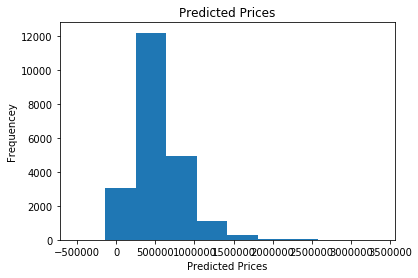

In [21]:
# your turn
plt.hist(lm.predict(X))
plt.title("Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequencey")
plt.show()

The above predicted prices show somewhat of a resemblance to a bell shaped curve. The midpoint of a normal distribution 
is where mean, median, mode fall. It appears slightly right skewed. 

Text(0.5, 1.0, 'Relationship between Predicted Price and Original Price')

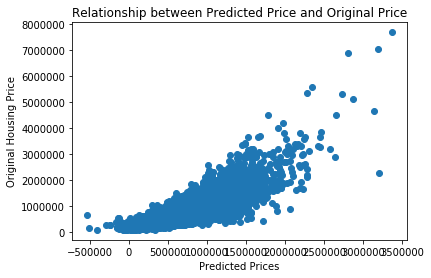

In [22]:
plt.scatter(lm.predict(X), df.price)
plt.xlabel("Predicted Prices")
plt.ylabel("Original Housing Price")
plt.title("Relationship between Predicted Price and Original Price")

The scatter plot above shows a positive correlation between predicted prices and original house prices. As predicted
house prices increase, so do original house prices. 

# Lasso Regression

Often we want to penalize the number of features in a model in order to keep the most important features, this is 
called regularization. Lasso is a common regularization technique. 

Lasso regression is used for feature selection in which is selects important features of a dataset. Lasso shrinks the
coefficients of less important features to 0. The features whose coefficients are not shrunk to 0 are 'selected' by the 
Lasso algorithm. 

The higher the alpha value, the majority of coefficients are equal to zero. As alpha values decrease (0.00001) there are 
more coefficients. We would like to find an alpha in a mid point (0.4) that will show the most important features/coeffients
while the rest are zero. 

In [23]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
# Regularization I: Lasso
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(x_test,y_test)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


[-4.09832566e+04  4.11644760e+04  2.11879955e+02  1.74516702e-01
 -2.76505404e+03  7.30078750e+05  5.15715206e+04  2.04939788e+04
  9.65146047e+04 -1.94043148e+01 -6.40981313e+01 -2.69321785e+03
  1.37167676e+01 -5.79101812e+02  5.83556689e+05 -2.27716327e+05
  1.85203685e+01 -4.20028666e-01]


C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df = df.drop(['sqft_above','yr_built'], axis=1)

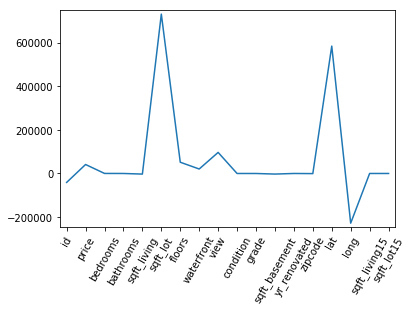

In [27]:
# Plot the coefficients
plt.plot(range(len(df.columns)), lasso_coef)
plt.xticks(range(len(df.columns)), df.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

Lasso regression above illustrates that square footage for living/lot size, waterfront view, zipcode, and lat/long are the most important features selected by lasso regression coefficients for predicting price.

In [28]:
y_pred = lasso.predict(x_test)

# R2 for the training set.
lasso.score(x_train, y_train)

0.6922860337937782

In [29]:
# R2 for the testing set.
lasso.score(x_test, y_test)

0.710574856095469

# Fitting Linear Regression using statsmodels

In [30]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
# statsmodels works nicely with pandas dataframes
m = ols('price ~ bedrooms + bathrooms +sqft_living + waterfront + zipcode',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     5219.
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:25:08   Log-Likelihood:            -2.9906e+05
No. Observations:               21613   AIC:                         5.981e+05
Df Residuals:                   21607   BIC:                         5.982e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.204e+07   3.16e+06    -16.448      


Looking at the coefficients in the middle table, let us first interpret the bathroom coefficient (1.358e+04) by 
looking at the p-value which is so small, essentially zero. This means that number of bathrooms is statistically 
significant as a predicter of price. The regression coefficient means each additional bathroom correlates to an increase
of 13,580 dollars in property price of the other variables. The confidence interval gives us a range/estimate of possible 
values for additional bathrooms 6,957-20,200 dollars which is quite a significant amount when considering how many bathrooms
are needed in a house. 

Looking at zipcode, we see that it has a small p-value close to zero as well. The regression coefficient of 531.1033 
potentially means that the difference between zipcodes is on average 531 dollars in house price. The confidence interval 
gives a range of possible values for this average change 467-594. 

All other variables being compared also have extremely small p-values that are essentially zero. Making all variables 
statistically significant as a predicter of price for a home. 

# RMSE

RMSE measures distance between our predicted values and actual values. How far off are our predictions? The smaller the 
value the better. 

In [32]:
min = df['price'].min()
max = df['price'].max()
mean = df['price'].mean()
print(min)
print(max)
print(mean)

75000.0
7700000.0
540182.1587933188


In [33]:
# Root Mean Squared Error
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 200914.4591


R^2 for training set is 0.69 and for the testing set is 0.71 The RMSE is 200,914 dollars. 
RMSE can be interpreted as the standard deviation of the unexplained variance. Also meaning that every house in 
the test fits into the range of 200,914 dollars. 

In [34]:
# Calculate Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 126193.2446


Mean Absolute Error (MAE) is a metric that shows the average weight/magnitude of errors in a set of predictions, without
taking their direction into account. It is the average of all absolute errors. 

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train, y_train)

C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [36]:
print('Random Forest R squared": %.4f' % forest_reg.score(x_test, y_test))

Random Forest R squared": 0.8614


In [37]:
y_pred = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 139025.8944


Random forest is a more complex model that was able to lower the RMSE from 200,914 to 140,591 dollars. Random forests 
are an ensemble (multiple learning algorithms to obtain better predictions)learning method 
for classification, regression. In short, random forest builds multiple decision trees and merges them together to 
get a more accurate and stable prediction. 

Linear regression appears to have the best
results for model prediction. Lasso was interesting because it visually illustrated what features are most important in 
predicting house prices. 